In [2]:
import pandas as pd
import numpy as np
import matplotlib as plt
import re
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [59]:
# Stopwords in french (no information)
stopwords_fr = []
with open("data/stopwords/stopwords-fr.txt", 'r', encoding='utf-8') as f:
    stopwords_fr = f.readlines()
    stopwords_fr = [w.strip() for w in stopwords_fr]
stopwords_fr[:10]

['a', 'à', 'abord', 'absolument', 'afin', 'ah', 'ai', 'aie', 'aient', 'aies']

In [4]:
# punctations in french (no information)
punctuations_fr = "\"$%&'?!()*+,-./:;=@[\]^_`{|}'~«»´’–"

In [5]:
# Load all the tweets
party_tweets = pd.read_csv("data/twitter_data/party_tweets.csv")
member_tweets = pd.read_csv("data/twitter_data/merged_member_tweets.csv")

In [6]:
# Adding a new column called year and which contains the year of the tweets
def extract_year(tweets):
    tweets_copy = tweets.copy()
    tweets_copy['year'] = tweets_copy['timestamp'].str[-4:].astype(int)  
    return tweets_copy

In [7]:
# Add the years of the tweets
party_tweets = extract_year(party_tweets)
member_tweets = extract_year(member_tweets)

In [8]:
# Change name of a column to be coherent
party_tweets = party_tweets.rename(columns={'partyname': 'party_name'})

In [9]:
party_tweets.head()

,id,timestamp,party_name,username,tweet_text,all_hashtags,all_mentions,all_urls,retweet_count,favorite_count,range,lang,year
0,1196812925580840961,Tue Nov 19 15:30:11 +0000 2019,UDC Suisse,UDCch,"Durant la session d’hiver à venir, le Parlemen...",[],[],['https://www.udc.ch/actualites/articles/commu...,0,5,259,fr,2019
1,1196375024124538880,Mon Nov 18 10:30:07 +0000 2019,UDC Suisse,UDCch,"Le glissement à gauche, qui a eu lieu lors des...",[],[],['https://www.udc.ch/actualites/articles/commu...,1,9,218,fr,2019
2,1189851774510874624,Thu Oct 31 10:29:04 +0000 2019,UDC Suisse,UDCch,"Au lieu d'attaquer le mal à la racine, le Cons...",[],[],['https://www.udc.ch/actualites/articles/commu...,2,7,145,fr,2019
3,1187013387508748288,Wed Oct 23 14:30:19 +0000 2019,UDC Suisse,UDCch,Les conséquences nuisibles de l’immigration dé...,[],[],['https://www.udc.ch/actualites/articles/commu...,3,17,208,fr,2019
4,1186266665358647298,Mon Oct 21 13:03:07 +0000 2019,UDC Suisse,UDCch,«Un tout grand Merci à toutes les électrices e...,[],[],[],7,28,272,fr,2019


In [10]:
member_tweets.head()

,id,timestamp,member_name,party_name,username,tweet_text,all_hashtags,all_mentions,all_urls,retweet_count,favorite_count,range,lang,year
0,1196747623471996928,Tue Nov 19 11:10:42 +0000 2019,Christian Levrat,PS Suisse,ChristianLevrat,@patoudoux @nantermod Heureux pays... petits s...,[],"['patoudoux', 'nantermod']",[],0,5,56,fr,2019
1,1196741312264970240,Tue Nov 19 10:45:37 +0000 2019,Christian Levrat,PS Suisse,ChristianLevrat,"RT @MikeMuellerLate: Liebe @claudia_blumer, ge...",[],"['MikeMuellerLate', 'claudia_blumer', 'tagesan...",[],27,0,140,de,2019
2,1196064766248280066,Sun Nov 17 13:57:16 +0000 2019,Christian Levrat,PS Suisse,ChristianLevrat,"Des résultats convaincants, voire époustouflan...",[],"['MarinaCarobbio', 'zanettiroberto', 'PaulRech...",[],13,98,159,fr,2019
3,1193533989333749760,Sun Nov 10 14:20:52 +0000 2019,Christian Levrat,PS Suisse,ChristianLevrat,Alors qu’on attend toujours les résultats (ent...,[],[],[],16,89,106,fr,2019
4,1193083434790531073,Sat Nov 09 08:30:31 +0000 2019,Christian Levrat,PS Suisse,ChristianLevrat,"Merci d’y penser, de faire un effort et de pas...",[],[],[],7,41,194,fr,2019


In [11]:
party_tweets['party_name'].unique()

array(['UDC Suisse', 'PS Suisse', 'PLR Suisse', 'Les VERTS suisses 🌻',
       "Vert'libéraux Suisse", 'SVP Schweiz', 'SP Schweiz', 'FDP Schweiz',
       'GRÜNE Schweiz 🌻', 'Grünliberale Schweiz', 'CVP PDC PPD PCD'],
      dtype=object)

In [12]:
# Replace the german names of the parties by the french ones 
party_tweets.loc[(party_tweets.party_name == 'SVP Schweiz'), 'party_name'] = 'UDC Suisse'
party_tweets.loc[(party_tweets.party_name == 'SP Schweiz'), 'party_name'] = 'PS Suisse'
party_tweets.loc[(party_tweets.party_name == 'FDP Schweiz'), 'party_name'] = 'PLR Suisse'
party_tweets.loc[(party_tweets.party_name == 'GRÜNE Schweiz 🌻'), 'party_name'] = 'Les VERTS suisses 🌻'
party_tweets.loc[(party_tweets.party_name == 'Grünliberale Schweiz'), 'party_name'] = "Vert'libéraux Suisse"
party_tweets['party_name'].unique()

array(['UDC Suisse', 'PS Suisse', 'PLR Suisse', 'Les VERTS suisses 🌻',
       "Vert'libéraux Suisse", 'CVP PDC PPD PCD'], dtype=object)

In [13]:
member_tweets['party_name'].unique()

array(['PS Suisse', 'CVP PDC PPD PCD', 'UDC Suisse',
       'Les VERTS suisses 🌻', "Vert'libéraux Suisse", 'PLR Suisse'],
      dtype=object)

In [14]:
# Group all the tweets (member + party) in one dataframe 
tweets = pd.concat([party_tweets, member_tweets], sort=True)
tweets

,all_hashtags,all_mentions,all_urls,favorite_count,id,lang,member_name,party_name,range,retweet_count,timestamp,tweet_text,username,year
0,[],[],['https://www.udc.ch/actualites/articles/commu...,5,1196812925580840961,fr,NaN,UDC Suisse,259,0,Tue Nov 19 15:30:11 +0000 2019,"Durant la session d’hiver à venir, le Parlemen...",UDCch,2019
1,[],[],['https://www.udc.ch/actualites/articles/commu...,9,1196375024124538880,fr,NaN,UDC Suisse,218,1,Mon Nov 18 10:30:07 +0000 2019,"Le glissement à gauche, qui a eu lieu lors des...",UDCch,2019
2,[],[],['https://www.udc.ch/actualites/articles/commu...,7,1189851774510874624,fr,NaN,UDC Suisse,145,2,Thu Oct 31 10:29:04 +0000 2019,"Au lieu d'attaquer le mal à la racine, le Cons...",UDCch,2019
3,[],[],['https://www.udc.ch/actualites/articles/commu...,17,1187013387508748288,fr,NaN,UDC Suisse,208,3,Wed Oct 23 14:30:19 +0000 2019,Les conséquences nuisibles de l’immigration dé...,UDCch,2019
4,[],[],[],28,1186266665358647298,fr,NaN,UDC Suisse,272,7,Mon Oct 21 13:03:07 +0000 2019,«Un tout grand Merci à toutes les électrices e...,UDCch,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132835,['Ecopop'],[],[],31,535102663692914689,de,Ruedi Noser,PLR Suisse,103,21,Wed Nov 19 16:09:51 +0000 2014,Auch wenn wir uns in der 30% Marke befinden – ...,RuediNoser,2014
132836,['Swissness'],"['silvan_z', 'AargauerZeitung']",['http://ow.ly/Ew1k8'],1,535016276029374464,de,Ruedi Noser,PLR Suisse,82,0,Wed Nov 19 10:26:34 +0000 2014,Verordnungsstress um #Swissness. @silvan_z @Aa...,RuediNoser,2014
132837,['Innovationspark'],"['BaSchaffner', 'RuediNoser', 'NZZ']",[],0,534340108951244800,de,Ruedi Noser,PLR Suisse,140,1,Mon Nov 17 13:39:44 +0000 2014,RT @BaSchaffner: @RuediNoser @NZZ Deshalb JA z...,RuediNoser,2014
132838,['Innovationspark'],['NZZ'],['http://ow.ly/i/7BDgb'],1,534259720618381312,de,Ruedi Noser,PLR Suisse,96,1,Mon Nov 17 08:20:18 +0000 2014,Wie der #Innovationspark Schweiz private Inves...,RuediNoser,2014


In [15]:
print("Years of activity for each party: ")
years_UDC = party_tweets[party_tweets.party_name=='UDC Suisse']['year'].unique()
print("UDC: %s" % years_UDC)
years_PS = party_tweets[party_tweets.party_name=='PS Suisse']['year'].unique()
print("PS: %s" % years_PS)
years_PLR = party_tweets[party_tweets.party_name=='PLR Suisse']['year'].unique()
print("PLR: %s" % years_PLR)
years_VERTS = party_tweets[party_tweets.party_name=='Les VERTS suisses 🌻']['year'].unique()
print("VERTS: %s" % years_VERTS)
years_VERTS_LIB = party_tweets[party_tweets.party_name=="Vert'libéraux Suisse"]['year'].unique()
print("VERTS LIB: %s" % years_VERTS_LIB)
years_PDC = party_tweets[party_tweets.party_name=='CVP PDC PPD PCD']['year'].unique()
print("PDC: %s" % years_PDC)

Years of activity for each party: 
UDC: [2019 2018 2017 2016 2015 2014 2013]
PS: [2019 2018 2017 2016 2015 2014 2013 2012 2011]
PLR: [2019 2018 2017 2016 2015]
VERTS: [2019 2018 2017 2016 2015 2014 2013 2012 2011 2010]
VERTS LIB: [2019 2018 2017 2016 2015 2014 2012 2011 2010]
PDC: [2019 2018 2017]


# Keywords of parties

In [60]:
from collections import Counter

YEARS = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]

def tweets_to_text(tweets, lang, party_name, year=YEARS):
    """
    Returns a text of all the tweets of a party after processing them.
    
    lang: {'fr','de'}
    username: {'PS Suisse', 'CVP PDC PPD PCD', 'UDC Suisse',
       'Les VERTS suisses 🌻', "Vert'libéraux Suisse", 'PLR Suisse'}
    year: default = [2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010]
    """
    tweets_copy = tweets.copy()
    tweets_copy = tweets_copy[tweets_copy.lang==lang]
    tweets_copy = tweets_copy[tweets_copy.party_name==party_name]
    tweets_copy = tweets_copy[tweets_copy['year'].isin(year)]
    tweets_copy = tweets_copy["tweet_text"].str.lower()
    
    text = ""
    for t in tweets_copy:
        text += ' ' +  t
    
    text = re.sub(r'https:\/\/t\.co\/.{10}', '', text)
    text = re.sub(r'http:\/\/t\.co\/.{10}', '', text)
    
    if (lang=='fr'):
        for c in punctuations_fr:
            text = text.replace(c, ' ')
        for w in stopwords_fr:
            regex = r" " + w + " "
            text = re.sub(regex, ' ', text)
        text = text.replace('  ', ' ')
        text = text.replace('  ', ' ')
        text = text.replace('  ', ' ')
        
        return text
    else:
        raise NotImplementedError # TODO    

def text_to_bag(text):
    """
    Return a bag of word sorted by frequency given a text
    """
    return Counter(text.split(" ")).most_common()


In [61]:
# Generating the text for all parties:
VERTS_text = tweets_to_text(tweets, lang='fr', party_name='Les VERTS suisses 🌻')
UDC_text = tweets_to_text(tweets, lang='fr', party_name='UDC Suisse')
PLR_text = tweets_to_text(tweets, lang='fr', party_name='PLR Suisse')
PDC_text = tweets_to_text(tweets, lang='fr', party_name='CVP PDC PPD PCD')
PS_text = tweets_to_text(tweets, lang='fr', party_name='PS Suisse')
VERTS_LIB_text = tweets_to_text(tweets, lang='fr', party_name="Vert'libéraux Suisse")

In [62]:
VERTS_bag = text_to_bag(VERTS_text)
VERTS_bag

[('verts', 920),
 ('adelethorens', 592),
 ('conseil', 534),
 ('suisse', 534),
 ('lesvertssuisses', 505),
 ('initiative', 451),
 ('climat', 447),
 ('vertsvd', 438),
 ('\u2066', 400),
 ('fédéral', 262),
 ('ui', 258),
 ('…', 254),
 ('lesvertssuisse', 243),
 ('politique', 239),
 ('#climat', 237),
 ('amp', 227),
 ('parlement', 225),
 ('#vertsad', 202),
 ('national', 193),
 ('climatique', 183),
 ('protection', 176),
 ('loi', 175),
 ('ge', 155),
 ('environnement', 152),
 ('2', 149),
 ('etats', 147),
 ('femmes', 144),
 ('économie', 144),
 ('vert', 140),
 ('voter', 140),
 ('faire', 138),
 ('ada', 137),
 ('faut', 137),
 ('parti', 136),
 ('regularytz', 136),
 ('égalité', 134),
 ('#electionsclimat2019🌍', 130),
 ('débat', 126),
 ('projet', 125),
 ('accord', 123),
 ('robertcramer', 122),
 ('berne', 121),
 ('élections', 120),
 ('jeunes', 120),
 ('campagne', 119),
 ('verte', 118),
 ('#ef2019', 118),
 ('letemps', 109),
 ('lausanne', 109),
 ('demain', 106),
 ('marra', 105),
 ('droits', 105),
 ('1', 105)

In [18]:
UDC_bag = text_to_bag(UDC_text)
UDC_bag

[('udc', 283),
 ('suisse', 255),
 ('conseil', 154),
 ('fédéral', 138),
 ('ue', 97),
 ('initiative', 75),
 ('accord', 72),
 ('immigration', 55),
 ('asile', 55),
 ('pays', 53),
 ('politique', 50),
 ('cadre', 49),
 ('national', 41),
 ('délégués', 38),
 ('peuple', 37),
 ('groupe', 36),
 ('gauche', 36),
 ('élections', 36),
 ('#libreetsûr', 36),
 ('veut', 35),
 ('institutionnel', 35),
 ('loi', 33),
 ('sécurité', 33),
 ('réforme', 32),
 ('ui', 31),
 ('démocratie', 31),
 ('#votezudc', 30),
 ('droit', 30),
 ('faire', 28),
 ('étrangers', 28),
 ('assemblée', 28),
 ('suisses', 26),
 ('commission', 26),
 ('libre', 25),
 ('économie', 25),
 ('cantons', 25),
 ('pacte', 25),
 ('lieu', 24),
 ('faut', 24),
 ('conseiller', 24),
 ('autodétermination', 24),
 ('projet', 23),
 ('🇨🇭', 23),
 ('liberté', 22),
 ('campagne', 22),
 ('nouvelle', 22),
 ('avs', 22),
 ('parti', 22),
 ('parlement', 21),
 ('fédérales', 21),
 ('confédération', 21),
 ('majorité', 21),
 ('vote', 21),
 ('femmes', 20),
 ('exige', 20),
 ('nu',

In [19]:
PLR_bag = text_to_bag(PLR_text)
PLR_bag

[('rt', 3161),
 ('plr', 2187),
 ('suisse', 1720),
 ('#chvote', 704),
 ('#ef2015', 624),
 ('conseil', 486),
 ('#plr', 417),
 ('…', 403),
 ('#ad', 384),
 ('initiative', 364),
 ('vincentarlettaz', 353),
 ('ui', 326),
 ('nantermod', 299),
 ('politique', 288),
 ('rtsinfo', 270),
 ('#parlch', 262),
 ('vd', 256),
 ('https', 255),
 ('débat', 254),
 ('national', 245),
 ('fédéral', 243),
 ('loi', 240),
 ('letemps', 230),
 ('isabellemoret', 228),
 ('#polch', 226),
 ('faire', 213),
 ('faut', 191),
 ('président', 188),
 ('ch', 187),
 ('campagne', 186),
 ('1', 184),
 ('petragoessi', 171),
 ('temps', 171),
 ('lifrancais', 170),
 ('2', 170),
 ('etats', 169),
 ('conseiller', 163),
 ('berne', 157),
 ('fderder', 153),
 ('parti', 152),
 ('http', 150),
 ('#ef2019', 146),
 ('jour', 145),
 ('candidats', 144),
 ('etat', 142),
 ('pays', 141),
 ('ans', 140),
 ('amp', 140),
 ('groupe', 139),
 ('#avancerensemble', 139),
 ('grand', 139),
 ('voter', 138),
 ('veut', 137),
 ('demain', 136),
 ('soir', 136),
 ('buerche

In [20]:
PDC_bag = text_to_bag(PDC_text)
PDC_bag

[('rt', 1456),
 ('pdc', 995),
 ('conseil', 592),
 ('suisse', 557),
 ('#pdc', 551),
 ('cvp', 458),
 ('national', 444),
 ('#parlch', 427),
 ('initiative', 421),
 ('ui', 252),
 ('li3979', 248),
 ('fédéral', 246),
 ('#chvote', 234),
 ('voix', 223),
 ('santé', 214),
 ('ybuttet', 199),
 ('coûts', 196),
 ('débat', 187),
 ('politique', 170),
 ('pays', 156),
 ('➡️', 153),
 ('pdcvr', 145),
 ('projet', 142),
 ('veut', 137),
 ('faire', 137),
 ('etats', 133),
 ('loi', 133),
 ('…', 133),
 ('président', 129),
 ('2', 128),
 ('conseiller', 128),
 ('collombey', 128),
 ('micgirod', 125),
 ('#ef2019', 124),
 ('campagne', 123),
 ('muraz', 123),
 ('groupe', 118),
 ('#adpdc', 118),
 ('#suisse', 117),
 ('vote', 117),
 ('peuple', 107),
 ('nouvelle', 107),
 ('mathiasreynard', 104),
 ('abstentions', 102),
 ('centre', 99),
 ('fédérales', 99),
 ('parti', 98),
 ('ans', 97),
 ('bonne', 95),
 ('gerhardpfister', 93),
 ('#pv2020', 92),
 ('parlement', 90),
 ('frein', 88),
 ('grand', 85),
 ('rtsinfo', 85),
 ('réforme', 8

In [21]:
PS_bag = text_to_bag(PS_text)
PS_bag

[('rt', 6785),
 ('suisse', 1736),
 ('pssuisse', 1096),
 ('conseil', 1082),
 ('ps', 924),
 ('initiative', 756),
 ('ui', 747),
 ('nordmannroger', 618),
 ('mathiasreynard', 602),
 ('…', 588),
 ('udc', 566),
 ('politique', 552),
 ('plr', 520),
 ('fédéral', 494),
 ('christianlevrat', 473),
 ('https', 461),
 ('femmes', 458),
 ('faire', 445),
 ('national', 436),
 ('ans', 431),
 ('faut', 402),
 ('vote', 391),
 ('travail', 391),
 ('2', 389),
 ('ch', 384),
 ('parlement', 379),
 ('rtsinfo', 362),
 ('#chvote', 350),
 ('jcschwaab', 342),
 ('loi', 329),
 ('pays', 319),
 ('ada', 316),
 ('égalité', 307),
 ('1', 302),
 ('droit', 295),
 ('marra', 290),
 ('droits', 276),
 ('temps', 275),
 ('suisses', 272),
 ('réforme', 271),
 ('débat', 270),
 ('avs', 264),
 ('campagne', 263),
 ('majorité', 261),
 ('3', 260),
 ('#pv2020', 260),
 ('veut', 257),
 ('soutien', 241),
 ('#adps', 241),
 ('etat', 240),
 ('groupe', 236),
 ('carlosommaruga', 235),
 ('10', 230),
 ('projet', 228),
 ('genève', 227),
 ('gauche', 222),


In [22]:
VERTS_LIB_bag = text_to_bag(VERTS_LIB_text)
VERTS_LIB_bag

[('rt', 774),
 ('vert', 402),
 ('vertliberaux', 310),
 ('libéraux', 289),
 ('suisse', 288),
 ('chevalley', 278),
 ('ch', 210),
 ('#créateursdavenir', 207),
 ('#ef2019', 157),
 ('jvl', 155),
 ('initiative', 150),
 ('conseil', 146),
 ('ui', 133),
 ('vd', 118),
 ('#parlch', 88),
 ('faire', 85),
 ('libéral', 83),
 ('national', 76),
 ('parti', 75),
 ('nucléaire', 72),
 ('udc', 72),
 ('ge', 71),
 ('loi', 71),
 ('temps', 68),
 ('jeunes', 68),
 ('matin', 67),
 ('politique', 65),
 ('mwuarin', 64),
 ('économie', 61),
 ('…', 59),
 ('pays', 58),
 ('accord', 54),
 ('fédéral', 52),
 ('faut', 50),
 ('grand', 50),
 ('kadrikhof', 50),
 ('pvlvd', 49),
 ('campagne', 48),
 ('femmes', 48),
 ('juerg', 46),
 ('grossen', 46),
 ('climatique', 44),
 ('vaudois', 44),
 ('président', 43),
 ('climat', 43),
 ('veut', 42),
 ('benjilaredo', 42),
 ('isfpo', 41),
 ('protection', 41),
 ('énergie', 41),
 ('plr', 41),
 ('#chvote', 41),
 ('berne', 40),
 ('kathrinbertschy', 40),
 ('votez', 39),
 ('élections', 39),
 ('isabell

# Political topics

In [23]:
# Partially based on https://www.rts.ch/info/suisse/10732046-les-primes-maladie-perdraient-en-influence-sur-les-choix-electoraux.html
topics_list = {'Climate':['climat','#climat','climatique','environnement','co2','environnementale'],
                'Immigration':['immigration','asile','étranger','étrangers','réfugié','réfugiés','migration','migrations'],
                'Safety':['sécurité','criminalité'],
                'Liberty':['liberté','libre'],
                'Egality':['égalité','solidaire','solidarité'],
                'Economy':['économie','économies','économique','économiques','marché'],
                'Work':['travail','emploi','emplois','entreprise','entreprises','chômage','chômeur','salaire','salaires','salariale','travailleurs','travailleurs'],
                'Women':['femme','femmes'],
                'Digital':['numérique','numériques','internet','digital'],
                'Family':['famille','familles','mariage','mariages','enfant','enfants'],
                'AVS':['avs'],
                'Health':['santé','maladie'],
                'Europe':['europe','ue','#ue','européen']
                  }      

In [24]:
# Helpers methods

# Keep only the values of the topics list 
def topics_list_to_keyword(topics_list):
    list_keywords = list(topics_list.values())
    keywords = []
    for k in list_keywords:
        for l in range(0,len(k)):
            keywords.append(k[l])
    return keywords

# Transform a bag of words into a dictionnary
def bag_to_dictionnary(bag):
    dic = {}
    for b in bag:
        word = b[0]
        count = b[1]
        dic.update({word : count})
    return dic

# Keep only the keywords of a dictionnary
def keep_only_keywords(dic, keywords):
    dic_key = {}
    for k in keywords:
        if k in dic:
            dic_key.update({k:dic.get(k)})
    return dic_key

# The frequency of each topic
def frequency_by_topic(dic_key, num_words):
    dic_numbers = {}
    for key, value in topics_list.items():
        count = 0
        for v in value:
            if v in dic_key:
                count += dic_key.get(v)
        freq = 100 * count/num_words
        dic_numbers.update({key:freq})
    return dic_numbers

In [25]:
def bag_to_kewords_frequency(bag, topics_list):
    """
    Return the frequency (%) of the occurences of the words
    of a given topics_list in a bag of words
    """
    keywords = topics_list_to_keyword(topics_list)
    dic = bag_to_dictionnary(bag)
    dic_key = keep_only_keywords(dic, keywords)
    return frequency_by_topic(dic_key, np.array((list(dic_key.values()))).sum())

In [26]:
bag_to_kewords_frequency(UDC_bag, topics_list)

{'Climate': 4.317789291882556,
 'Immigration': 31.43350604490501,
 'Safety': 6.217616580310881,
 'Liberty': 8.117443868739205,
 'Egality': 0.690846286701209,
 'Economy': 9.499136442141623,
 'Work': 9.153713298791018,
 'Women': 3.7996545768566494,
 'Digital': 0.0,
 'Family': 3.626943005181347,
 'AVS': 3.7996545768566494,
 'Health': 1.381692573402418,
 'Europe': 18.307426597582037}

In [27]:
bag_to_kewords_frequency(VERTS_bag, topics_list)

{'Climate': 46.689019279128246,
 'Immigration': 3.8139145012573343,
 'Safety': 1.5507124895222129,
 'Liberty': 2.388935456831517,
 'Egality': 7.963118189438391,
 'Economy': 9.89103101424979,
 'Work': 7.376362112321877,
 'Women': 6.663872590108969,
 'Digital': 1.2573344509639564,
 'Family': 4.526404023470243,
 'AVS': 0.8382229673093042,
 'Health': 3.0176026823134956,
 'Europe': 4.065381391450126}

In [28]:
bag_to_kewords_frequency(PS_bag, topics_list)

{'Climate': 8.012048192771084,
 'Immigration': 8.875502008032129,
 'Safety': 2.5301204819277108,
 'Liberty': 3.674698795180723,
 'Egality': 9.437751004016064,
 'Economy': 5.763052208835341,
 'Work': 23.333333333333332,
 'Women': 11.04417670682731,
 'Digital': 1.8072289156626506,
 'Family': 8.012048192771084,
 'AVS': 5.301204819277109,
 'Health': 5.522088353413655,
 'Europe': 8.21285140562249}

In [29]:
bag_to_kewords_frequency(PLR_bag, topics_list)

{'Climate': 8.511806699615596,
 'Immigration': 9.00604063701263,
 'Safety': 3.9538714991762767,
 'Liberty': 10.104338275672708,
 'Egality': 2.471169686985173,
 'Economy': 14.00329489291598,
 'Work': 19.165293794618343,
 'Women': 5.766062602965404,
 'Digital': 6.974190005491488,
 'Family': 5.875892366831411,
 'AVS': 2.3064250411861615,
 'Health': 4.448105436573312,
 'Europe': 7.907742998352553}

In [30]:
bag_to_kewords_frequency(PDC_bag, topics_list)

{'Climate': 4.01360544217687,
 'Immigration': 8.70748299319728,
 'Safety': 4.829931972789115,
 'Liberty': 3.673469387755102,
 'Egality': 3.5374149659863945,
 'Economy': 10.54421768707483,
 'Work': 12.993197278911564,
 'Women': 5.238095238095238,
 'Digital': 1.9727891156462585,
 'Family': 15.918367346938776,
 'AVS': 4.557823129251701,
 'Health': 17.346938775510203,
 'Europe': 6.938775510204081}

In [31]:
bag_to_kewords_frequency(VERTS_LIB_bag, topics_list)

{'Climate': 28.973509933774835,
 'Immigration': 4.304635761589404,
 'Safety': 3.1456953642384105,
 'Liberty': 4.635761589403973,
 'Egality': 4.470198675496689,
 'Economy': 15.066225165562914,
 'Work': 10.43046357615894,
 'Women': 8.278145695364238,
 'Digital': 0.4966887417218543,
 'Family': 6.456953642384106,
 'AVS': 1.6556291390728477,
 'Health': 2.152317880794702,
 'Europe': 10.099337748344372}

### Generating the word cloud

In [67]:
UDC_logo = np.array(Image.open("data/logo/Logo_UDC_2010.gif"))
UDC_logo

array([[251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       ...,
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251],
       [251, 251, 251, ..., 251, 251, 251]], dtype=uint8)

In [68]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [69]:
# Transform your mask into a new one that will work with the function:
UDC_logo_mask = np.ndarray((UDC_logo.shape[0],UDC_logo.shape[1]), np.int32)

for i in range(len(UDC_logo)):
    UDC_logo_mask[i] = list(map(transform_format, UDC_logo[i]))

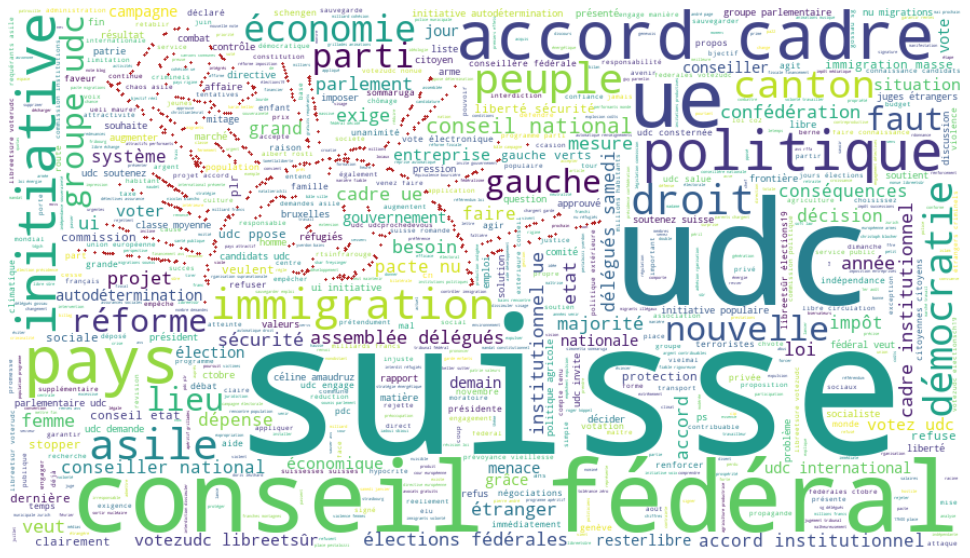

In [74]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=UDC_logo_mask, contour_width=3, contour_color='firebrick')

# Generate a wordcloud
wc.generate(UDC_text)

# store to file
#wc.to_file("data/logo/udc_words.png")

# show
plt.pyplot.figure(figsize=[20,10])
plt.pyplot.imshow(wc, interpolation='bilinear')
plt.pyplot.axis("off")
plt.pyplot.show()

In [85]:
# Generate a word cloud image
mask = np.array(Image.open("data/logo/Logo_UDC_2010.gif").convert('RGB'))
#mask= mask.convert('RGB')
wordcloud_usa = WordCloud(background_color="white", mode="RGBA", max_words=1000, mask=mask).generate(UDC_text)


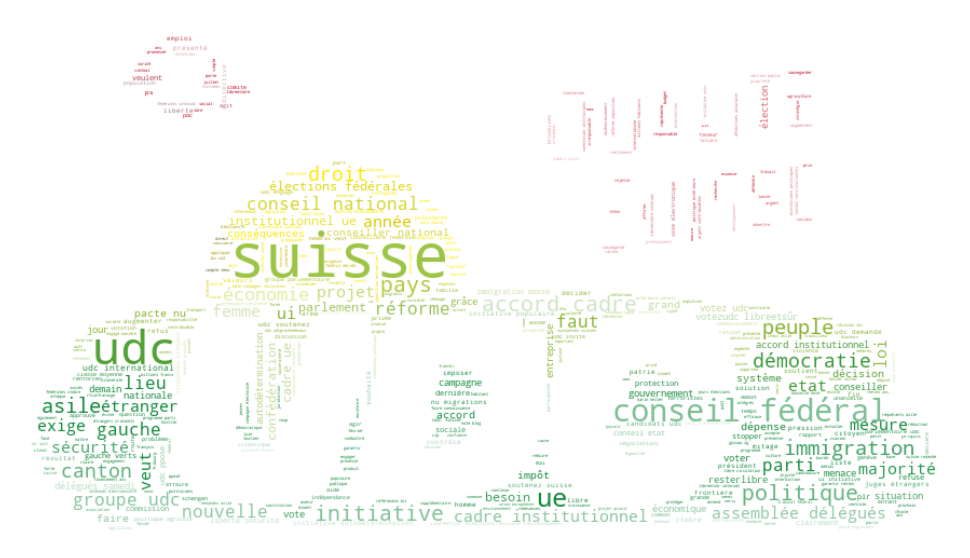

In [88]:

# create coloring from image
image_colors = ImageColorGenerator(mask)
plt.pyplot.figure(figsize=[20,10])
plt.pyplot.imshow(wordcloud_usa.recolor(color_func=image_colors), interpolation="bilinear")
plt.pyplot.axis("off")

# store to file
#plt.savefig("img/us_wine.png", format="png")

plt.pyplot.show()

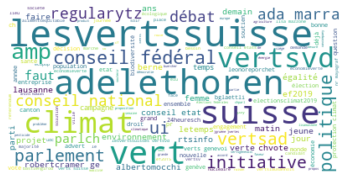

In [65]:
wordcloud = WordCloud(background_color="white").generate(VERTS_text)
plt.pyplot.imshow(wordcloud, interpolation='bilinear')
plt.pyplot.axis("off")
plt.pyplot.show()